In [2]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

In [3]:
## name of datasets that are present in seaborn library
 
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
## iris dataset

data = sns.load_dataset('iris')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

In [7]:
## count the species present in species column

data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

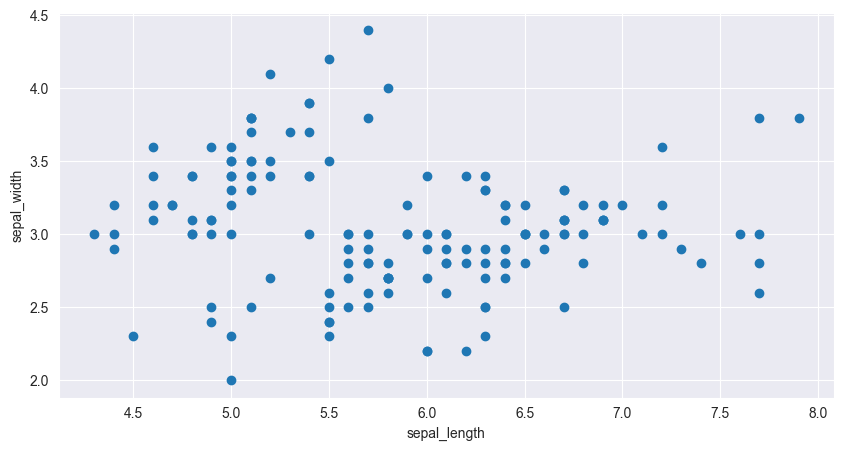

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(data['sepal_length'], data['sepal_width']);
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

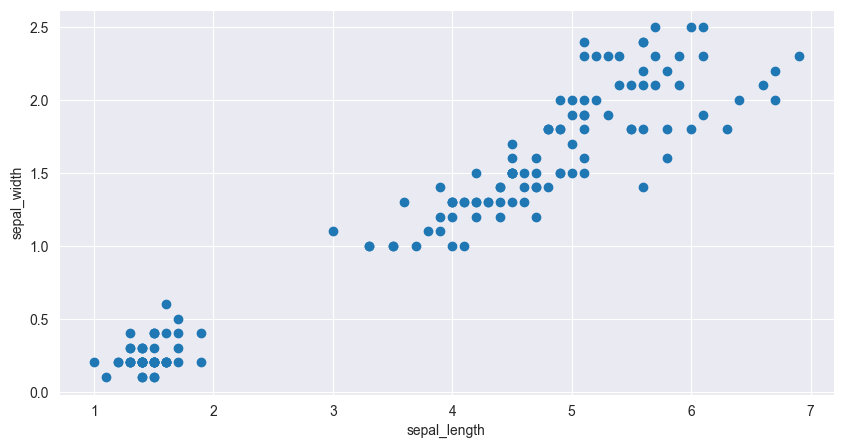

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(data['petal_length'], data['petal_width'], marker='o');
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

In [10]:
## checking the null values 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
## converting species into label encoding

def map_species(f):
    if f == 'setosa':
        f = 0
    elif f == 'versicolor':
        f = 1
    elif f == 'virginica':
        f = 2
    return f

In [13]:
data['species'] = data.species.map(map_species)

In [14]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


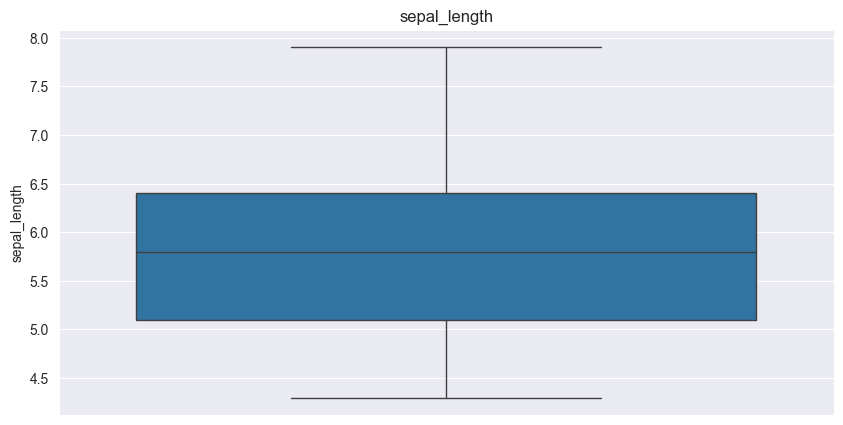

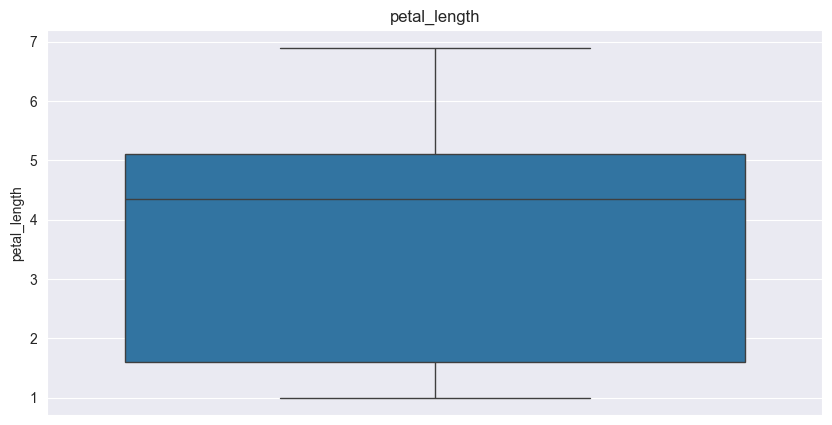

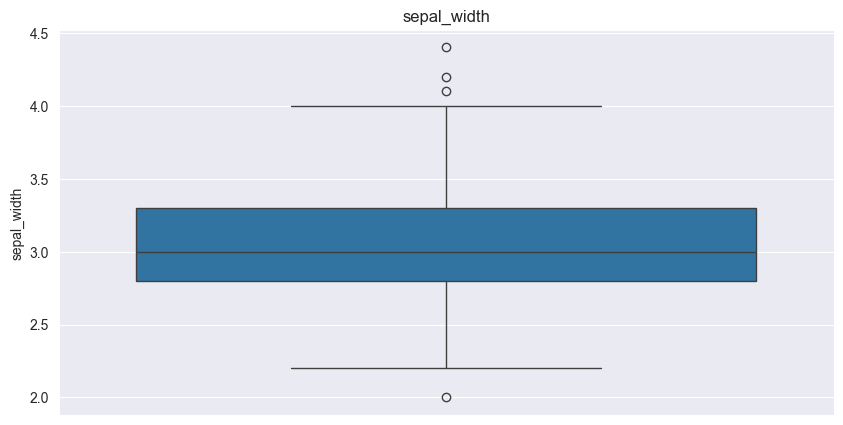

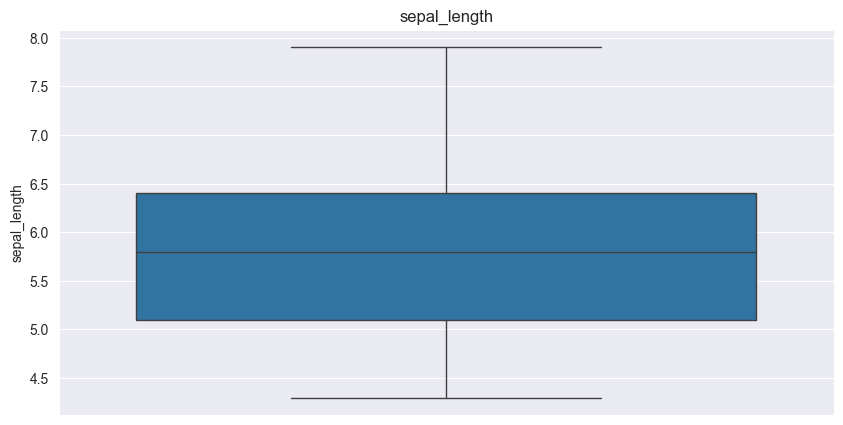

In [15]:
for f in ['sepal_length', 'petal_length', 'sepal_width', 'sepal_length']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[f])
    plt.title(f)

In [16]:
## independent and dependent features

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [17]:
## preprocessing

sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [20]:
lg = LogisticRegression()

In [21]:
lg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
pred = lg.predict(X_test)

--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

------------------------------------------Accuracy Score---------------------------------------------------------
1.0
--------------------------------------------Confustion Matrix-----------------------------------------------------


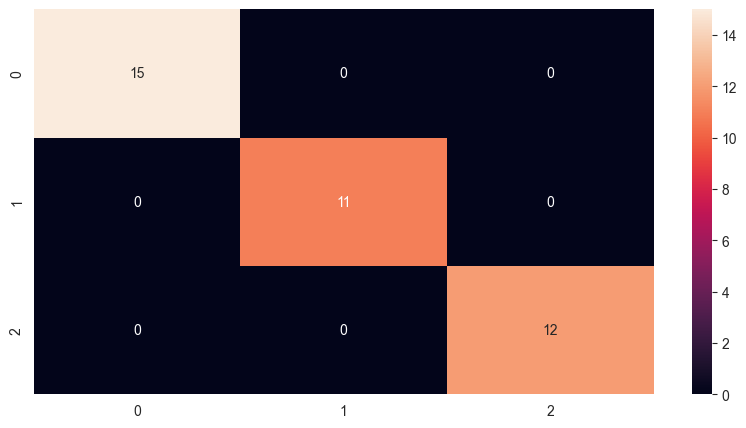

In [23]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

In [24]:
pd.DataFrame({'Actual': y_test,  'Predicted': pred}).head(50)

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1
